Surya Teja Nagamalla              #Titanic Survival prediction


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

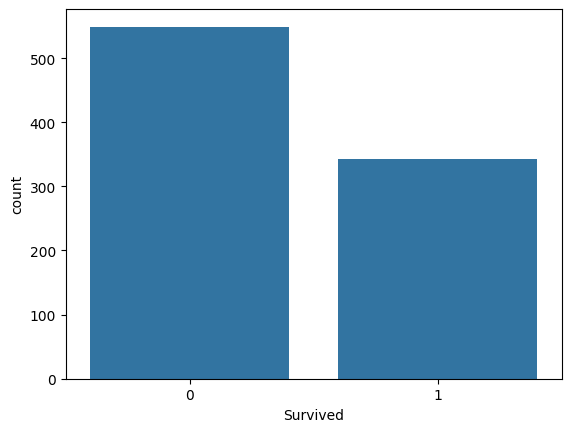

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Survived')


<Axes: xlabel='Age', ylabel='Count'>

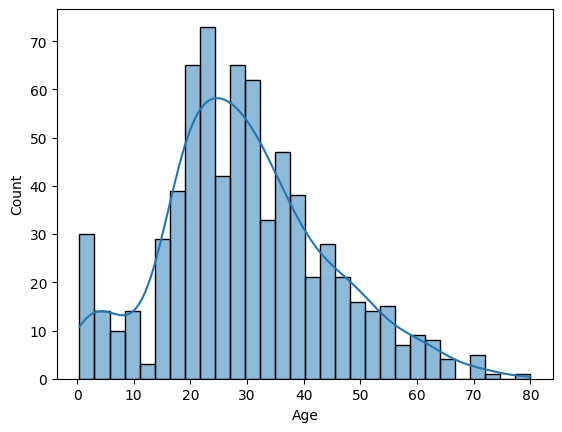

In [ ]:
sns.histplot(data=df,x='Age',bins=30,kde=True)

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Survived, Length: 88, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

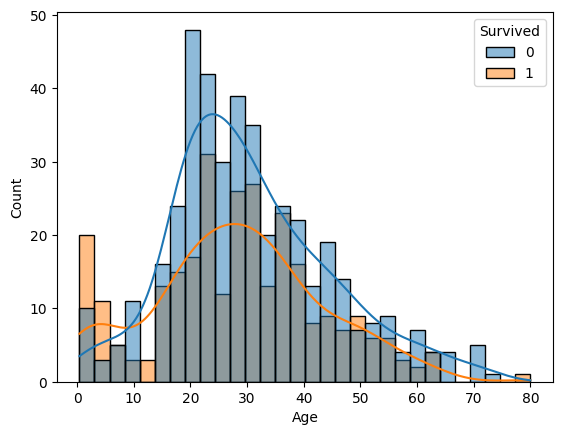

In [ ]:
#age distribution by survival
print(df.groupby('Age')['Survived'].count())
sns.histplot(x=df['Age'], hue=df['Survived'],bins=30, kde=True)


<Axes: xlabel='Fare', ylabel='Count'>

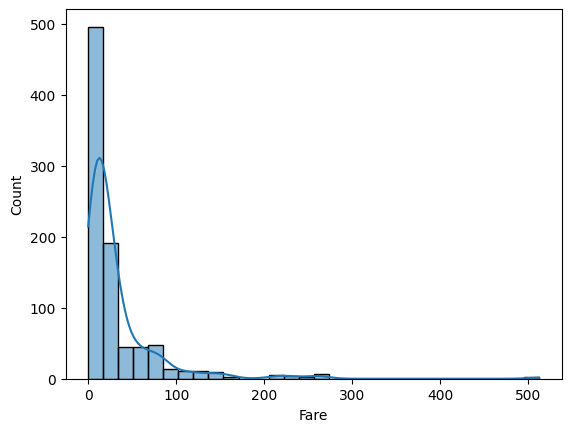

In [ ]:

sns.histplot(data=df,x='Fare',bins=30,kde=True)

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

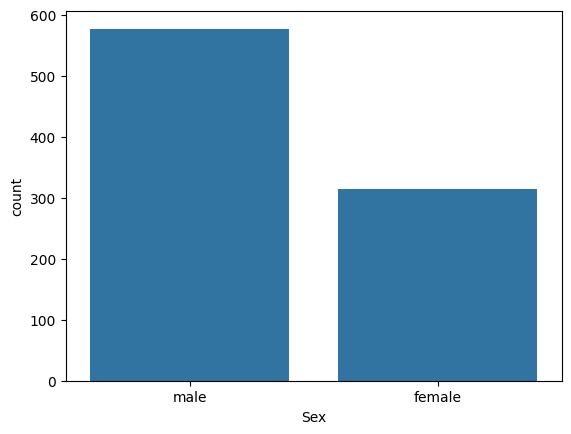

In [ ]:
sns.countplot(data=df, x='Sex')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

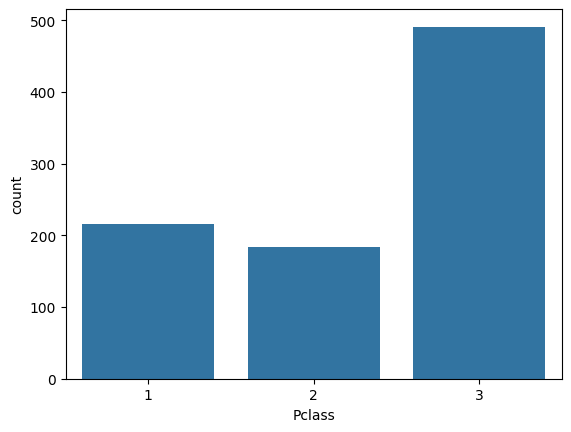

In [ ]:
print(df['Pclass'].value_counts())
sns.countplot(data=df,x='Pclass')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

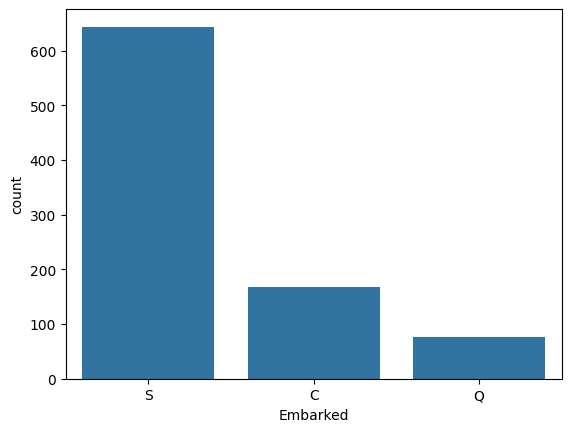

In [ ]:
print(df['Embarked'].value_counts())
sns.countplot(data=df,x='Embarked')

Embarked  Sex   
C         female     64
          male       29
Q         female     27
          male        3
S         female    140
          male       77
Name: Survived, dtype: int64


<Axes: xlabel='Embarked', ylabel='Survived'>

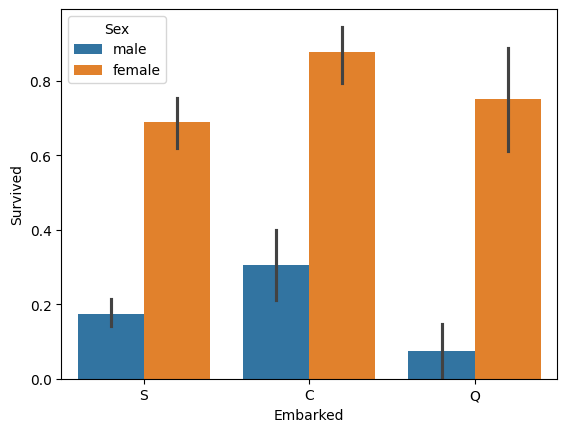

In [ ]:
print(df.groupby(['Embarked','Sex'])['Survived'].sum())
sns.barplot(data=df,y='Survived',x='Embarked',hue='Sex')

In [ ]:
#Data Processing

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
 #Dropped columns that are not relevant for analysis since Cabin column has lot many null values
 df.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Handling Null Values
df['Age']=df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [ ]:
print(df['Embarked'].mode()[0])

S


In [ ]:
df['Embarked']=df['Embarked'].fillna(df["Embarked"].mode()[0])
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
#Aiming To find correlation matrix
#Dropping columns that are not relevant to analysis
df=df.drop(columns=['Name','PassengerId','Ticket'])

In [ ]:
#Encoding categorical variables and preparing data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoding=LabelEncoder()

cat_var=['Embarked','Sex']
for col in cat_var:
    df[col]=labelEncoding.fit_transform(df[col])


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<Axes: >

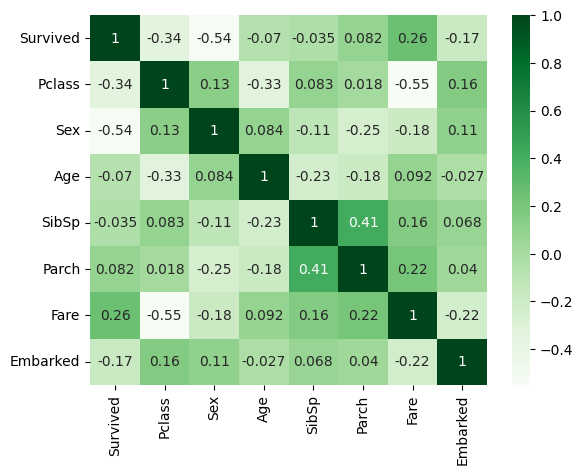

In [ ]:
corl=df.corr()
sns.heatmap(corl, annot=True,cmap='Greens')

In [ ]:
#Data Visualization according to correlation Matrix

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

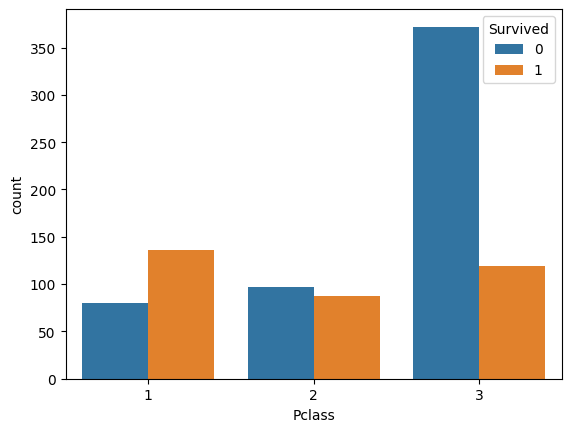

In [ ]:
#Pclass VS Survived
print(df.groupby('Pclass')['Survived'].sum())
sns.countplot(data=df,x='Pclass',hue='Survived')

Sex
0    233
1    109
Name: Survived, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

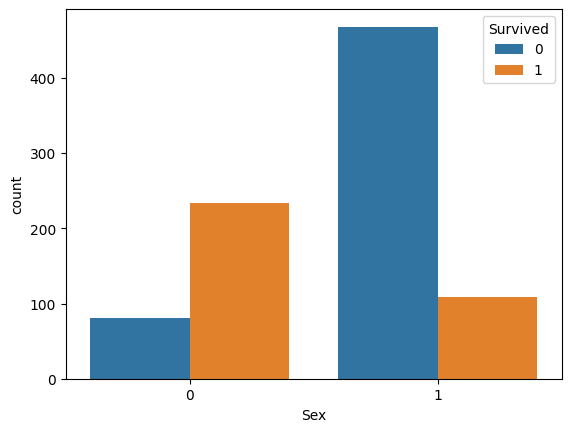

In [ ]:
#Sex Vs Survived
print(df.groupby('Sex')['Survived'].sum())
sns.countplot(data=df,x='Sex',hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

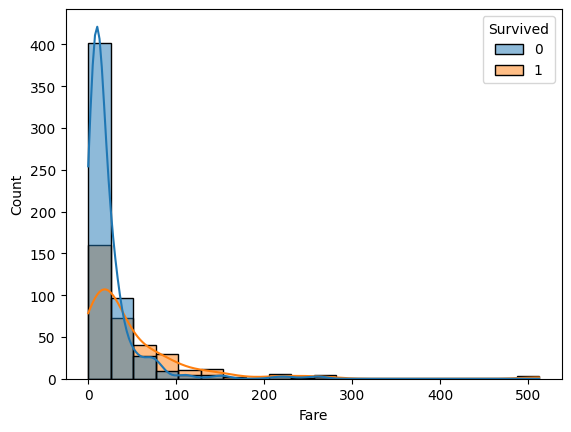

In [ ]:
#Fare Vs Survived
sns.histplot(x='Fare', hue='Survived',data=df,bins=20,kde=True)

Embarked
0     93
1     30
2    219
Name: Survived, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

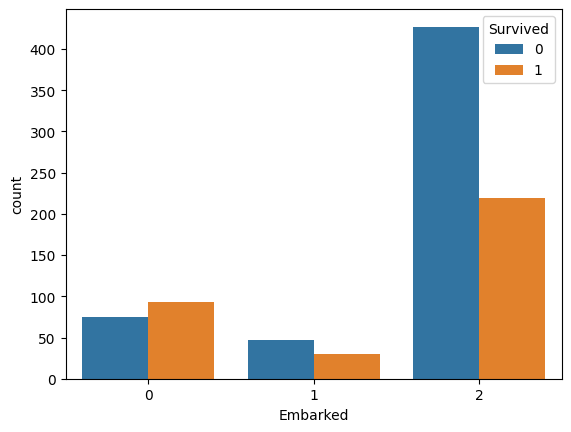

In [ ]:
#Embarked vs Survived
print(df.groupby('Embarked')['Survived'].sum())
sns.countplot(x='Embarked',hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

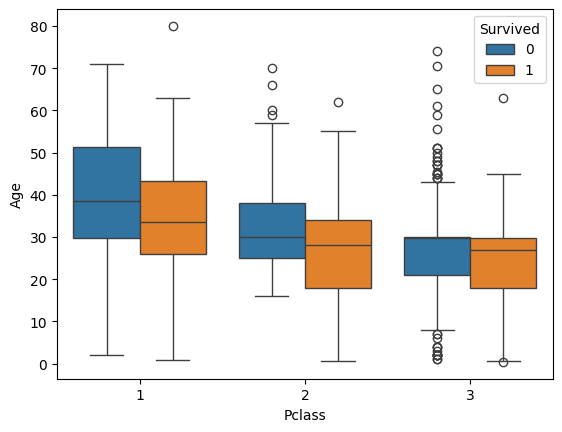

In [ ]:
#Pclass, Age distribution Vs Survived
import seaborn as sns
sns.boxplot(data=df,x='Pclass',y='Age',hue='Survived')

                mean  sum  count
Pclass Sex                      
1      0    0.968085   91     94
       1    0.368852   45    122
2      0    0.921053   70     76
       1    0.157407   17    108
3      0    0.500000   72    144
       1    0.135447   47    347


<Axes: xlabel='Pclass', ylabel='Survived'>

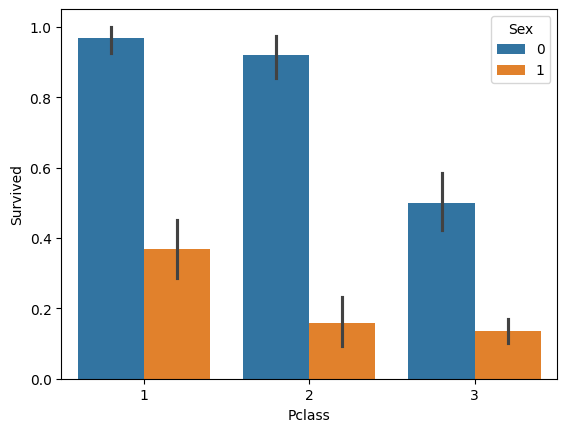

In [ ]:
#pclass, Sex vs Survived
print(df.groupby(['Pclass','Sex'])['Survived'].agg(['mean','sum','count']))

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

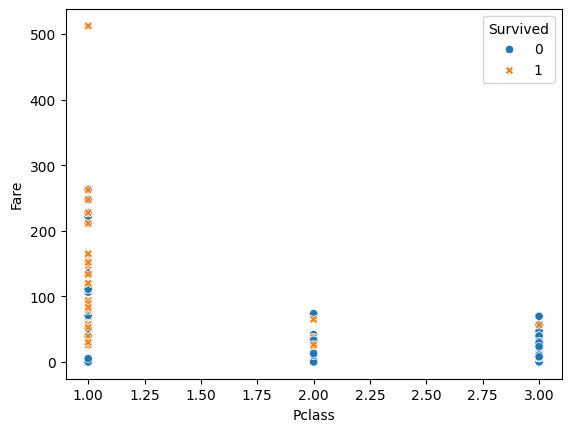

In [ ]:
sns.scatterplot(data=df, x='Pclass', y='Fare', hue='Survived',style='Survived')


<Axes: xlabel='Sex', ylabel='Fare'>

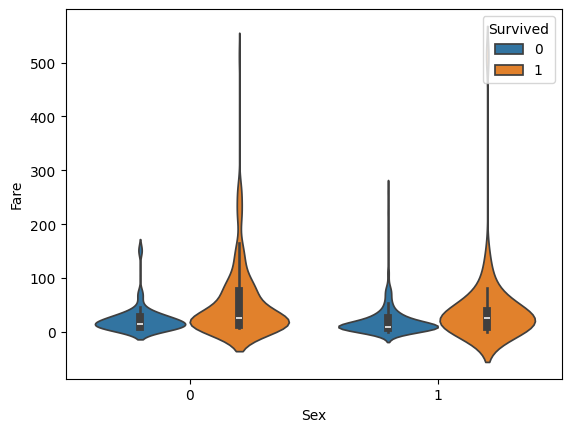

In [ ]:
sns.violinplot(data=df, x='Sex', y='Fare', hue='Survived')

In [ ]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.167675
Name: Survived, dtype: float64

In [ ]:
#splitting data into train and test datasets.
from sklearn.model_selection import train_test_split
Y=df['Survived']
#I have dropped columns that have very low correlation with respect to Survived
X=df.drop(columns=['Survived','Age','SibSp','Parch'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [ ]:
#Implementing LG model and Random forrest Classifier(x=pclass, sex, fare and embarked, y= survived)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

LG= LogisticRegression()
LG.fit(X_train, Y_train)
y_pred = LG.predict(X_test)

print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1]


In [ ]:
Accuracy = accuracy_score(Y_test, y_pred)
print('The Accuracy score for Logistic Regression is:\n', Accuracy*100)
Clas_repo=classification_report(Y_test,y_pred)
print('The classification report for Logistic Regression model is:\n',Clas_repo)

The Accuracy score for Logistic Regression is:
 76.53631284916202
The classification report for Logistic Regression model is:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.70      0.77      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
#Random Forrest Classifier Model
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, Y_train)
y_pred =RFC.predict(X_test)
Accuracy = accuracy_score(Y_test, y_pred)
print('The Accuracy score for Random Forrest Classifier is:\n', Accuracy*100)
Clas_repo=classification_report(Y_test,y_pred)
print('The classification report for Random Forrest Classifier model is:\n',Clas_repo)


The Accuracy score for Random Forrest Classifier is:
 79.88826815642457
The classification report for Random Forrest Classifier model is:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
#Implementing Extreme Gradient Boosting
import xgboost as xgb
# Train an XGBoost Classifier
XGB = xgb.XGBClassifier()
XGB.fit(X_train, Y_train)
y_pred = XGB.predict(X_test)
Accuracy = accuracy_score(Y_test, y_pred)
print('The Accuracy score for XGBoost classifier is:\n', Accuracy*100)
Clas_repo=classification_report(Y_test,y_pred)
print('The classification report for XGBoost Classifier is:\n',Clas_repo)

The Accuracy score for XGBoost classifier is:
 81.56424581005587
The classification report for XGBoost Classifier is:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

